## Import Libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import time

print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.7.1+cu118


## 1. LU Decomposition

**LU Decomposition:** A = LU where L is lower triangular and U is upper triangular

In [2]:
A = torch.tensor([[4., 3., 2.], [3., 2., 1.], [2., 1., 3.]])
print(f"Original matrix A:\n{A}")

P, L, U = torch.linalg.lu(A)
print(f"\nPermutation P:\n{P}")
print(f"\nLower L:\n{L}")
print(f"\nUpper U:\n{U}")
print(f"\nReconstruction P@L@U:\n{P @ L @ U}")
print(f"\nReconstruction error: {torch.linalg.norm(A - P @ L @ U):.6e}")

Original matrix A:
tensor([[4., 3., 2.],
        [3., 2., 1.],
        [2., 1., 3.]])

Permutation P:
tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])

Lower L:
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 1.0000, 0.0000],
        [0.7500, 0.5000, 1.0000]])

Upper U:
tensor([[ 4.0000,  3.0000,  2.0000],
        [ 0.0000, -0.5000,  2.0000],
        [ 0.0000,  0.0000, -1.5000]])

Reconstruction P@L@U:
tensor([[4., 3., 2.],
        [3., 2., 1.],
        [2., 1., 3.]])

Reconstruction error: 0.000000e+00


## 2. QR Decomposition

**QR Decomposition:** A = QR where Q is orthogonal (Q'Q = I) and R is upper triangular

In [3]:
A = torch.randn(5, 3)
print(f"Original matrix A (5x3):\n{A}")

Q, R = torch.linalg.qr(A)
print(f"\nOrthogonal Q (5x3):\n{Q}")
print(f"\nUpper triangular R (3x3):\n{R}")
print(f"\nOrthogonality check Q'Q:\n{Q.T @ Q}")
print(f"\nReconstruction error: {torch.linalg.norm(A - Q @ R):.6e}")

Original matrix A (5x3):
tensor([[ 0.1149,  0.9689,  0.5346],
        [ 0.7449, -1.4241,  0.7022],
        [ 0.1775,  0.3636,  1.1822],
        [-1.9868, -1.6121, -1.3909],
        [ 1.2173, -0.6939, -0.5558]])

Orthogonal Q (5x3):
tensor([[-0.0468,  0.3900, -0.1134],
        [-0.3034, -0.6658, -0.5522],
        [-0.0723,  0.1327, -0.6364],
        [ 0.8092, -0.4670,  0.0506],
        [-0.4958, -0.4110,  0.5240]])

Upper triangular R (3x3):
tensor([[-2.4553, -0.6000, -1.1734],
        [ 0.0000,  2.4123,  0.7759],
        [ 0.0000,  0.0000, -1.5624]])

Orthogonality check Q'Q:
tensor([[ 1.0000e+00, -1.4901e-08,  5.9605e-08],
        [-1.4901e-08,  1.0000e+00, -8.9407e-08],
        [ 5.9605e-08, -8.9407e-08,  1.0000e+00]])

Reconstruction error: 4.897021e-07


## 3. Singular Value Decomposition (SVD)

**SVD:** A = UΣV' where U and V are orthogonal, Σ is diagonal with singular values

In [4]:
A = torch.randn(4, 6)
print(f"Original matrix A (4x6)")

U, S, Vh = torch.linalg.svd(A, full_matrices=False)
print(f"\nU shape: {U.shape}")
print(f"S shape: {S.shape}")
print(f"Vh shape: {Vh.shape}")
print(f"\nSingular values: {S}")

# Reconstruct
A_reconstructed = U @ torch.diag(S) @ Vh
print(f"\nReconstruction error: {torch.linalg.norm(A - A_reconstructed):.6e}")

Original matrix A (4x6)

U shape: torch.Size([4, 4])
S shape: torch.Size([4])
Vh shape: torch.Size([4, 6])

Singular values: tensor([3.9973, 2.3118, 1.6619, 0.9008])

Reconstruction error: 2.266881e-06


## 4. Eigenvalue Decomposition

**Eigenvalue Decomposition:** A = VΛV⁻¹ where Λ is diagonal with eigenvalues, V contains eigenvectors

In [15]:
A = torch.tensor([[4., 1.], [2., 3.]])
print(f"Matrix A:\n{A}")

eigenvalues, eigenvectors = torch.linalg.eig(A)
print(f"\nEigenvalues: {eigenvalues}")
print(f"\nEigenvectors:\n{eigenvectors}")

# Convert to real if eigenvalues are real
eigenvalues_real = eigenvalues.real
eigenvectors_real = eigenvectors.real

# Verify: A*v = λ*v
v1 = eigenvectors_real[:, 0]
lambda1 = eigenvalues_real[0]
print(f"\nVerification A*v1: {A @ v1}")
print(f"λ1*v1: {lambda1 * v1}")

Matrix A:
tensor([[4., 1.],
        [2., 3.]])

Eigenvalues: tensor([5.0000+0.j, 2.0000+0.j])

Eigenvectors:
tensor([[ 0.7071+0.j, -0.4472+0.j],
        [ 0.7071+0.j,  0.8944+0.j]])

Verification A*v1: tensor([3.5355, 3.5355])
λ1*v1: tensor([3.5355, 3.5355])


## 5. Cholesky Decomposition

**Cholesky Decomposition:** A = LL' for positive definite matrices, L is lower triangular

In [6]:
# Create positive definite matrix
A = torch.randn(4, 4)
A_pd = A @ A.T + torch.eye(4) * 0.1
print(f"Positive definite matrix:\n{A_pd}")

L = torch.linalg.cholesky(A_pd)
print(f"\nLower triangular L:\n{L}")
print(f"\nReconstruction L@L':\n{L @ L.T}")
print(f"\nReconstruction error: {torch.linalg.norm(A_pd - L @ L.T):.6e}")

Positive definite matrix:
tensor([[ 1.4771,  0.9633,  1.5182,  1.0059],
        [ 0.9633,  4.6940, -1.3603, -0.3674],
        [ 1.5182, -1.3603,  3.9890,  3.8730],
        [ 1.0059, -0.3674,  3.8730,  7.2809]])

Lower triangular L:
tensor([[ 1.2154,  0.0000,  0.0000,  0.0000],
        [ 0.7926,  2.0164,  0.0000,  0.0000],
        [ 1.2492, -1.1657,  1.0343,  0.0000],
        [ 0.8276, -0.5075,  2.1730,  1.2713]])

Reconstruction L@L':
tensor([[ 1.4771,  0.9633,  1.5182,  1.0059],
        [ 0.9633,  4.6940, -1.3603, -0.3674],
        [ 1.5182, -1.3603,  3.9890,  3.8730],
        [ 1.0059, -0.3674,  3.8730,  7.2809]])

Reconstruction error: 5.960464e-07


## 6. Low-Rank Approximation with SVD

Approximate a matrix using only its top-k singular values

In [7]:
A = torch.randn(10, 10)
print(f"Original matrix rank: {torch.linalg.matrix_rank(A)}")

U, S, Vh = torch.linalg.svd(A, full_matrices=False)

# Test different ranks
for rank in [1, 3, 5]:
    U_k = U[:, :rank]
    S_k = S[:rank]
    Vh_k = Vh[:rank, :]
    
    A_approx = U_k @ torch.diag(S_k) @ Vh_k
    error = torch.linalg.norm(A - A_approx, ord='fro')
    rel_error = error / torch.linalg.norm(A, ord='fro')
    
    print(f"\nRank-{rank} approximation:")
    print(f"  Frobenius error: {error:.4f}")
    print(f"  Relative error: {rel_error:.4f} ({rel_error*100:.2f}%)")

Original matrix rank: 10

Rank-1 approximation:
  Frobenius error: 7.7126
  Relative error: 0.8237 (82.37%)

Rank-3 approximation:
  Frobenius error: 5.4228
  Relative error: 0.5792 (57.92%)

Rank-5 approximation:
  Frobenius error: 3.0474
  Relative error: 0.3255 (32.55%)


## 7. Image Compression with SVD

Image shape: torch.Size([200, 200])


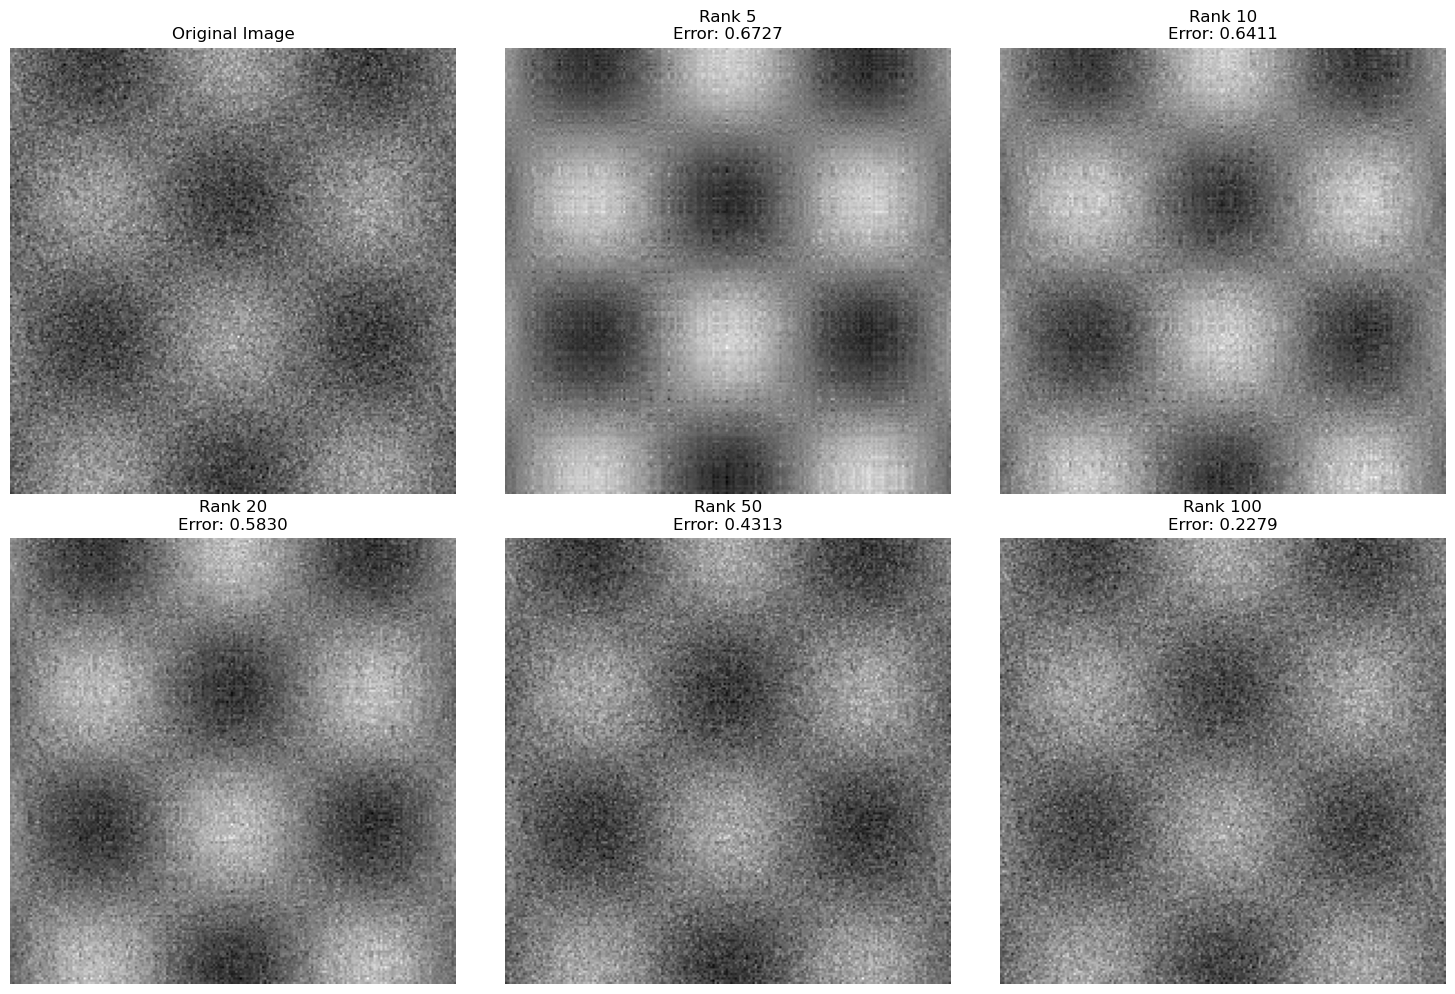

In [8]:
# Create synthetic image
x = torch.linspace(-5, 5, 200)
y = torch.linspace(-5, 5, 200)
X, Y = torch.meshgrid(x, y, indexing='ij')
image = torch.sin(X) * torch.cos(Y) + 0.5 * torch.randn(200, 200)

print(f"Image shape: {image.shape}")

# Compute SVD
U, S, Vh = torch.linalg.svd(image, full_matrices=False)

# Test different compression ranks
ranks = [5, 10, 20, 50, 100]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Original image
axes[0].imshow(image.numpy(), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Compressed images
for idx, rank in enumerate(ranks, start=1):
    U_k = U[:, :rank]
    S_k = S[:rank]
    Vh_k = Vh[:rank, :]
    A_approx = U_k @ torch.diag(S_k) @ Vh_k
    
    error = torch.linalg.norm(image - A_approx, ord='fro')
    rel_error = error / torch.linalg.norm(image, ord='fro')
    
    axes[idx].imshow(A_approx.numpy(), cmap='gray')
    axes[idx].set_title(f'Rank {rank}\nError: {rel_error:.4f}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 8. Singular Value Decay

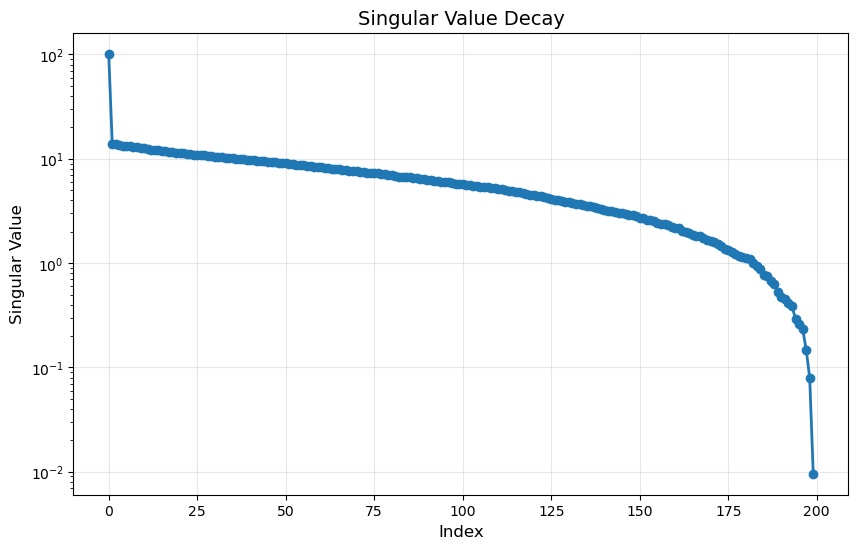

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogy(S.numpy(), 'o-', linewidth=2)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Singular Value', fontsize=12)
ax.set_title('Singular Value Decay', fontsize=14)
ax.grid(True, alpha=0.3)
plt.show()


## 9. Solving Linear Systems

Solve Ax = b using various methods

In [10]:
A = torch.randn(3, 3)
b = torch.randn(3)

# Direct solve
x = torch.linalg.solve(A, b)
print(f"Solution x: {x}")
print(f"\nVerification A @ x: {A @ x}")
print(f"b: {b}")
print(f"\nSolution error: {torch.linalg.norm(A @ x - b):.6e}")

Solution x: tensor([-25.8653,  69.0071,   3.1846])

Verification A @ x: tensor([-0.1363,  0.2910,  1.1293])
b: tensor([-0.1363,  0.2910,  1.1293])

Solution error: 1.694806e-06


## 10. Pseudo-Inverse (Moore-Penrose)

For rectangular or singular matrices

In [11]:
A = torch.randn(3, 5)
A_pinv = torch.linalg.pinv(A)

print(f"A shape: {A.shape}")
print(f"A_pinv shape: {A_pinv.shape}")
print(f"\nA @ A_pinv @ A ≈ A:")
print(f"Reconstruction error: {torch.linalg.norm(A @ A_pinv @ A - A):.6e}")

A shape: torch.Size([3, 5])
A_pinv shape: torch.Size([5, 3])

A @ A_pinv @ A ≈ A:
Reconstruction error: 6.290779e-07


## 11. Matrix Rank

In [12]:
# Full rank matrix
A_full = torch.randn(5, 5)
print(f"Full rank matrix (5x5): rank = {torch.linalg.matrix_rank(A_full)}")

# Rank deficient matrix
A_rank_def = torch.tensor([[1., 2., 3.], [2., 4., 6.], [3., 6., 9.]])
print(f"\nRank deficient matrix:\n{A_rank_def}")
print(f"Rank: {torch.linalg.matrix_rank(A_rank_def)}")

Full rank matrix (5x5): rank = 5

Rank deficient matrix:
tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])
Rank: 1


## 12. Benchmark Different Decompositions

In [13]:
sizes = [10, 50, 100, 200]
results = {'LU': [], 'QR': [], 'SVD': [], 'Eigen': [], 'Cholesky': []}

for n in sizes:
    print(f"\nMatrix size: {n}x{n}")
    
    # LU
    A = torch.randn(n, n)
    start = time.time()
    _ = torch.linalg.lu(A)
    results['LU'].append(time.time() - start)
    print(f"  LU: {results['LU'][-1]:.4f}s")
    
    # QR
    start = time.time()
    _ = torch.linalg.qr(A)
    results['QR'].append(time.time() - start)
    print(f"  QR: {results['QR'][-1]:.4f}s")
    
    # SVD
    start = time.time()
    _ = torch.linalg.svd(A, full_matrices=False)
    results['SVD'].append(time.time() - start)
    print(f"  SVD: {results['SVD'][-1]:.4f}s")
    
    # Eigen
    start = time.time()
    _ = torch.linalg.eig(A)
    results['Eigen'].append(time.time() - start)
    print(f"  Eigen: {results['Eigen'][-1]:.4f}s")
    
    # Cholesky (positive definite)
    A_pd = A @ A.T + torch.eye(n) * 0.1
    start = time.time()
    _ = torch.linalg.cholesky(A_pd)
    results['Cholesky'].append(time.time() - start)
    print(f"  Cholesky: {results['Cholesky'][-1]:.4f}s")


Matrix size: 10x10
  LU: 0.0032s
  QR: 0.0000s
  SVD: 0.0000s
  Eigen: 0.0014s
  Cholesky: 0.0000s

Matrix size: 50x50
  LU: 0.0023s
  QR: 0.0000s
  SVD: 0.0010s
  Eigen: 0.0011s
  Cholesky: 0.0000s

Matrix size: 100x100
  LU: 0.0015s
  QR: 0.0000s
  SVD: 0.0023s
  Eigen: 0.0057s
  Cholesky: 0.0000s

Matrix size: 200x200
  LU: 0.0010s
  QR: 0.0010s
  SVD: 0.0051s
  Eigen: 0.0174s
  Cholesky: 0.0025s


## 13. Plot Benchmark Results

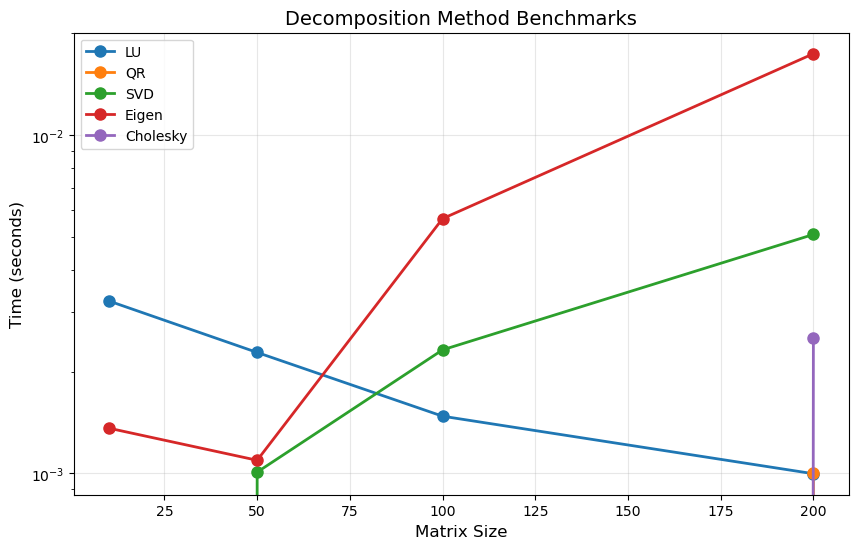

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
for method, times in results.items():
    ax.plot(sizes, times, 'o-', label=method, linewidth=2, markersize=8)

ax.set_xlabel('Matrix Size', fontsize=12)
ax.set_ylabel('Time (seconds)', fontsize=12)
ax.set_title('Decomposition Method Benchmarks', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_yscale('log')
plt.show()